<h1 style="font-size:3rem;color:orange;">Development of Mini Application of Indonesian Abusive Words Filter on Twitter with Stopword Removal Methods</h1>

- Analyze the character of the data
- Cleaning process of unnecessary data characters
- Analyze which data often appears
- Create a mini-app to perform character filtering on tweeters



### Good

In [36]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
sns.set(color_codes=True)

In [3]:
df = pd.read_csv('data.csv', encoding='latin-1') #data that will be analyzed

alay_dictionary = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None) #data "alay dictionary"
alay_dictionary = alay_dictionary.rename(columns={0: 'original', 
                                      1: 'replacement'}) 

d_abusive = pd.read_csv('abusive.csv', encoding='latin-1', header=None) #data abusive.
d_abusive = d_abusive.rename(columns={0: 'abusive'}) 


d_stopword1 = pd.read_csv('stopwordbahasa.csv', header=None) #data stop word.
d_stopword1 = d_stopword1.rename(columns={0: 'stopword'})
stopwords_new = pd.DataFrame(['sih','nya', 'iya', 'nih', 'biar', 'tau', 'kayak', 'banget'], columns=['stopword'])
d_stopword1 = pd.concat([d_stopword1,stopwords_new]).reset_index()
d_stopword1 = pd.DataFrame(d_stopword1['stopword'])

In [4]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [5]:
df.HS_Strong.value_counts() #calculates HS types based on their strength 


0    12696
1      473
Name: HS_Strong, dtype: int64

In [6]:
df.HS_Moderate.value_counts()

0    11464
1     1705
Name: HS_Moderate, dtype: int64

In [7]:
df.HS_Weak.value_counts()

0    9786
1    3383
Name: HS_Weak, dtype: int64

In [8]:
df.HS.value_counts() #counting hate speech tweets

0    7608
1    5561
Name: HS, dtype: int64

In [9]:
df.Abusive.value_counts()#counting rude tweets

0    8126
1    5043
Name: Abusive, dtype: int64

In [10]:
print("Toxic : ", df[(df['HS'] == 1) | (df['Abusive'] == 1)].shape) #counting toxic and non-toxic tweets
print("Non-toxic : ", df[(df['HS'] == 0) & (df['Abusive'] == 0)].shape)

Toxic :  (7309, 13)
Non-toxic :  (5860, 13)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HS', ylabel='count'>

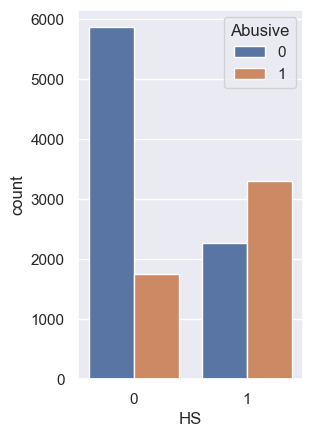

In [13]:
plt.subplot(1,2,1)
sns.countplot('HS', hue = 'Abusive', data = df)

In [14]:
df.columns

Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong'],
      dtype='object')

In [15]:
hatespeech_group = ['HS_Individual', 'HS_Group', 'HS_Religion','HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other']

In [16]:
list(enumerate(hatespeech_group)) #Dear mas Valdi I want to compare all these columns in 1 graph, 
#so the x-axis will contain all these columns and the y-axis will contain numbers

[(0, 'HS_Individual'),
 (1, 'HS_Group'),
 (2, 'HS_Religion'),
 (3, 'HS_Race'),
 (4, 'HS_Physical'),
 (5, 'HS_Gender'),
 (6, 'HS_Other')]

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-p

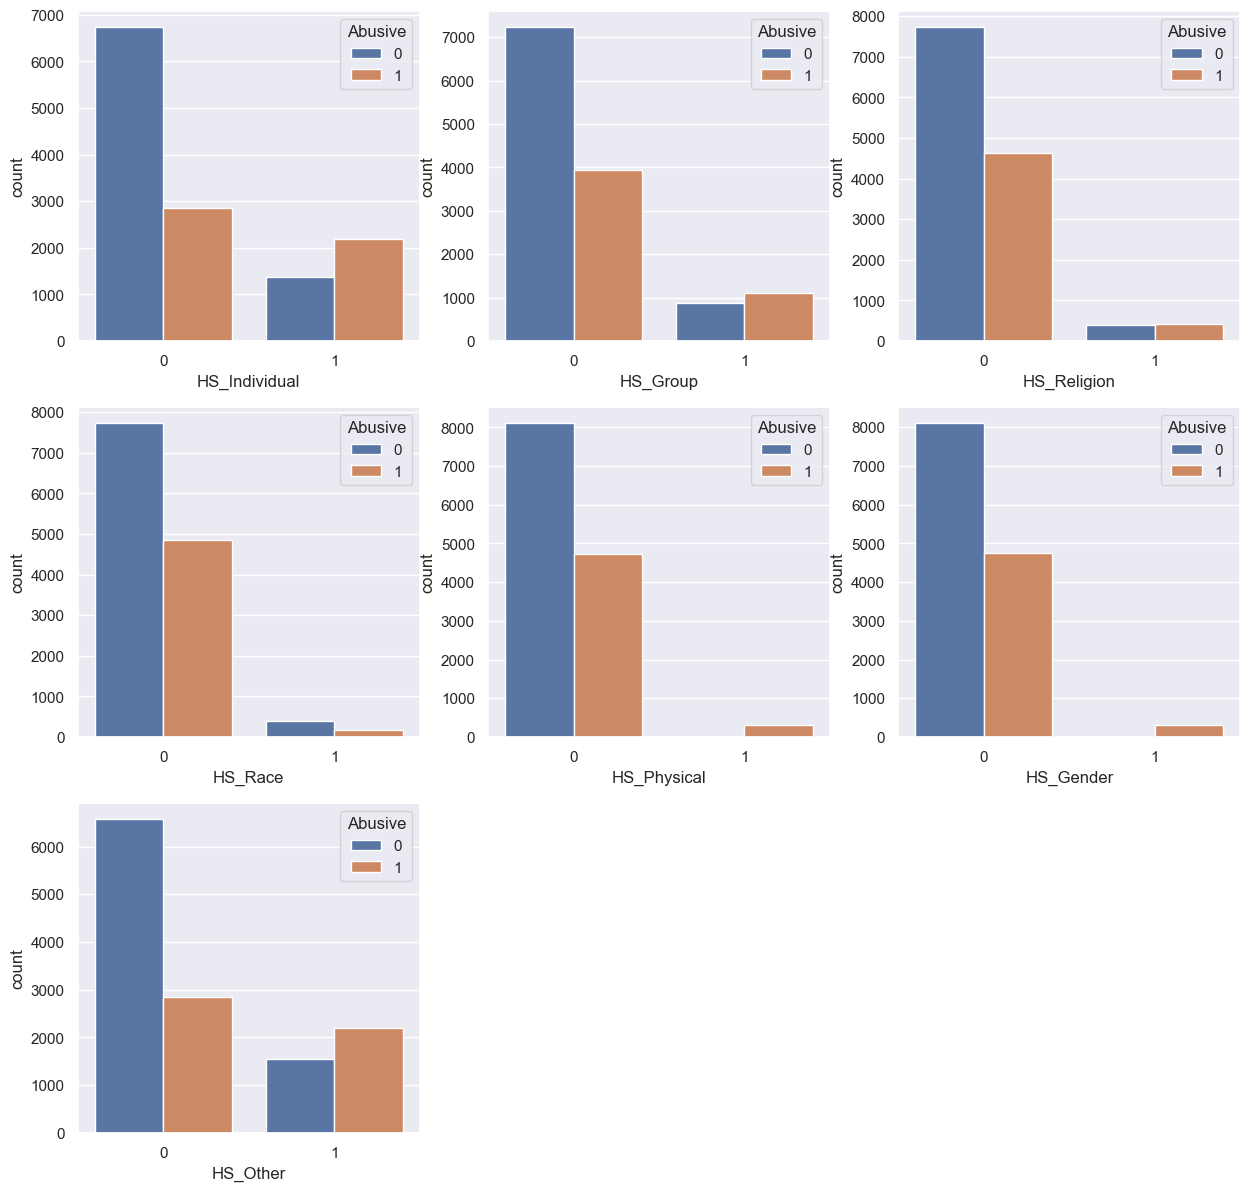

In [72]:
plt.figure(figsize = (15, 30))
for i in enumerate(hatespeech_group):
    plt.subplot(6, 3,i[0]+1)
    sns.countplot(i[1], hue = 'Abusive', data = df) #and why does this code result in this kind of text?
  

## Good, analisa dan visualisasi data.csv nya udah sangat lengkap

In [18]:
print("Shape: ", alay_dictionary.shape) #count data from the word "alay"
alay_dictionary.head(5)

Shape:  (15167, 2)


,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [19]:
print("Shape: ", d_stopword1.shape) #counts stopword data
d_stopword1.head()

Shape:  (766, 1)


,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak


In [20]:
import re
def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove '\n'
    text = re.sub('rt',' ',text) # Remove retweet symbol
    text = re.sub('user',' ',text) # Username omitted
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove URL
    text = re.sub('  +', ' ', text) # Extra spaces removed
    return text

In [21]:
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

In [22]:
alay_dict_map = dict(zip(alay_dictionary['original'], alay_dictionary['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])
#Replace the word "alay" with a standard wordy

def remove_abusive(text):
    text = ' '.join(['' if word in d_abusive.abusive.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def stopword_remover(text):
    text = ' '.join(['' if word in d_stopword1.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

print("remove_nonaplhanumeric: ", remove_nonaplhanumeric("SELAMATT PAGIII,,,, duniaa!!"))
print("lowercase: ", lowercase("selamatt pagiii,,,, duniaa!"))
print("remove_unnecessary_char: ", remove_unnecessary_char("Hehe\n\n RT USER USER apa kabs www.google.com\n  hehe"))
print("normalize_alay: ", normalize_alay("aamiin adek abis"))
print("remove_abusive: ", remove_abusive("cebong anjing suka makan tai"))
print("stop_word_remover: ", stopword_remover("kami dan keluarga senang mengajak anjing jalan jalan"))




remove_nonaplhanumeric:  SELAMATT PAGIII duniaa 
lowercase:  selamatt pagiii,,,, duniaa!
remove_unnecessary_char:  Hehe RT USER USER apa kabs hehe
normalize_alay:  amin adik habis
remove_abusive:  suka makan
stop_word_remover:  keluarga senang mengajak anjing jalan jalan


In [23]:
def preprocess(text):
    text = lowercase(text) # 1 Replacing capital letters with lowercase letters
    text = remove_nonaplhanumeric(text) # 2 Removes all characters other than alphabets
    text = remove_unnecessary_char(text) # 3 Remove unnecessary characters
    text = normalize_alay(text) # 4 Eliminate swear words, and replace them with standard words.
    text = remove_abusive(text) # 5 Eliminate abusive words
    return text

## Good.. seluruh fungsi udah bisa running yaa. Fungsi2 ini bisa dimasukan ke mini apps swaggernya yah

In [24]:
df['Tweet'] = df['Tweet'].apply(preprocess) # the logic of the mini aps is finished

In [25]:
print("Shape: ", df.shape)
df.head()

Shape:  (13169, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,di saat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa yang telat memberi tau kamu gue bergaul ...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu aku dan ku tau matamu tapi dilihat dar...,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum sudah kelihatan dongoknya dari awal tamba...,1,1,0,1,1,0,0,0,0,0,1,0


## Ini jangan lupa di save ke sqlite sesuai perintah challange nya

In [26]:
df.to_csv('preprocessed_indonesian.csv', index=False)

In [27]:
# preparation data will be analyzed using word cloud
# if I want to use visualization using wordcloud without using stopwords, is it okay
# The resulting visualization will not be too clean mas?

In [28]:
def preprocess(text):
    text = lowercase(text) # 1 Replacing capital letters with lowercase letters
    text = remove_nonaplhanumeric(text) # 2 Removes all characters other than alphabets
    text = remove_unnecessary_char(text) # 3 Remove unnecessary characters
    text = normalize_alay(text) # 4 Eliminate swear words, and replace them with standard words.
    text = remove_abusive(text) # 5 Eliminate abusive words
    text = stopword_remover(text) # 6 Remove stopwords in tweets
    return text

In [29]:
df['Tweet'] = df['Tweet'].apply(preprocess)

In [37]:
print("Shape: ", df.shape)
df.head(5)

Shape:  (13169, 15)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,text,toxic
0,cowok berusaha melacak perhatian gue lantas re...,1,1,1,0,0,0,0,0,1,1,0,0,cowok berusaha melacak perhatian gue lantas re...,positive
1,telat gue bergaul cigax jifla calis licew,0,1,0,0,0,0,0,0,0,0,0,0,telat gue bergaul cigax jifla calis licew,negative
2,41 kadang berpikir percaya tuhan jatuh berkali...,0,0,0,0,0,0,0,0,0,0,0,0,41 kadang berpikir percaya tuhan jatuh berkali...,negative
3,ku matamu,0,0,0,0,0,0,0,0,0,0,0,0,ku matamu,negative
4,kaum dongoknya haha,1,1,0,1,1,0,0,0,0,0,1,0,kaum dongoknya haha,positive


In [ ]:
# sorry mas this part of the data is still messy

In [46]:
train = df[['hs_class', 'text']]
base_train = train
train.to_csv('train_preprocessed.csv', index = False)
train.sample(5)

KeyError: "['hs_class'] not in index"

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(x='hs_class',df=hs)

NameError: name 'hs' is not defined

<Figure size 1200x600 with 0 Axes>

In [45]:
df['temp_list'] = df['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,indonesia,1678
1,presiden,1510
2,orang,1427
3,gue,1192
4,ya,1181
5,jokowi,1161
6,islam,886
7,uniform,821
8,resource,821
9,locator,821


In [40]:
positive_text = df[df['hs_class']=='positive']
negative_text = df[df['hs_class']=='negative']

KeyError: 'hs_class'

In [44]:
top = Counter([item for sublist in positive_text['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

NameError: name 'positive_text' is not defined

In [ ]:
top = Counter([item for sublist in negative_text['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

In [42]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(14.0,8.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout() 

In [43]:
pos_mask = np.array(Image.open('../input/masksforwordclouds/twitter_mask.png'))
plot_wordcloud(positive_text.text,color='white',max_font_size=100,title_size=30,title="WordCloud of Neutral Tweets", mask=pos_mask)

NameError: name 'Image' is not defined

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='HS_Race',data=df)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(text):
    # Membuat objek WordCloud dengan ukuran gambar 800x800 piksel
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

    # Mengatur plot
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [ ]:
create_wordcloud(' 'join('d_abusive'))

## point of view sudah bisa ditembak mau diapakan. Lanjutkan mas
note: kalau dari tahapan visualisasi dan cleaning udah oke. Mulai di susun ya fungsi2 cleansing diatas ke swaggernya.
buat tahap visualisasi, mas nya belum jelasin terkait analisa data abusive.csv dan kamusalay.csv nya